# Sprint 13. Pronosticos y predicciones

## Introducción 

En la actualidad, muchas empresas enfrentan el reto de la pérdida de clientes, un desafío especialmente común en el sector de los gimnasios. La cadena Model Fitness, consciente de este problema, ha decidido implementar una estrategia basada en datos analíticos para mejorar la interacción con sus usuarios. La retención de clientes se ha convertido en una prioridad, ya que no siempre es evidente cuándo un cliente decide abandonar un servicio. En el caso de los gimnasios, las ausencias prolongadas son un claro indicador de posible cancelación, y Model Fitness ha optado por digitalizar los perfiles de sus clientes para poder identificar patrones de comportamiento y desarrollar estrategias que fomenten la lealtad y reduzcan la tasa de cancelación. El siguiente análisis busca identificar oportunidades y soluciones para mejorar la retención de sus usuarios.

## Descarga de datos y exploración

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.cluster.hierarchy as sch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df_mf = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
df_mf.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
df_mf.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Estadistica descriptiva 

In [6]:
df_mf.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [7]:

churn_groups = df_mf.groupby('Churn').describe()

churn_groups


gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                 ... Avg_class_frequency_total            \
           mean  ...                       75%       max   
Churn            ...                                       
0      0.873086  ...                  2.732944  6.023668   
1      0.768143  ...                  1.956438  3.478646   

      Avg_class_frequency_current_month                                     \
                                  count      mean       std  min       25%   
Churn                                                                        
0                                2939.0  2.027882  1.018994  0.0  1.297021   
1                                1061.0  1.044546  0.770237  0.0  0.421337   

                                     
            50%       75%       max  
Churn                                
0      2.046697  2.740648  6.146783  
1      0.979445  1.588576  3.540271  

[2 rows x 104 columns]

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

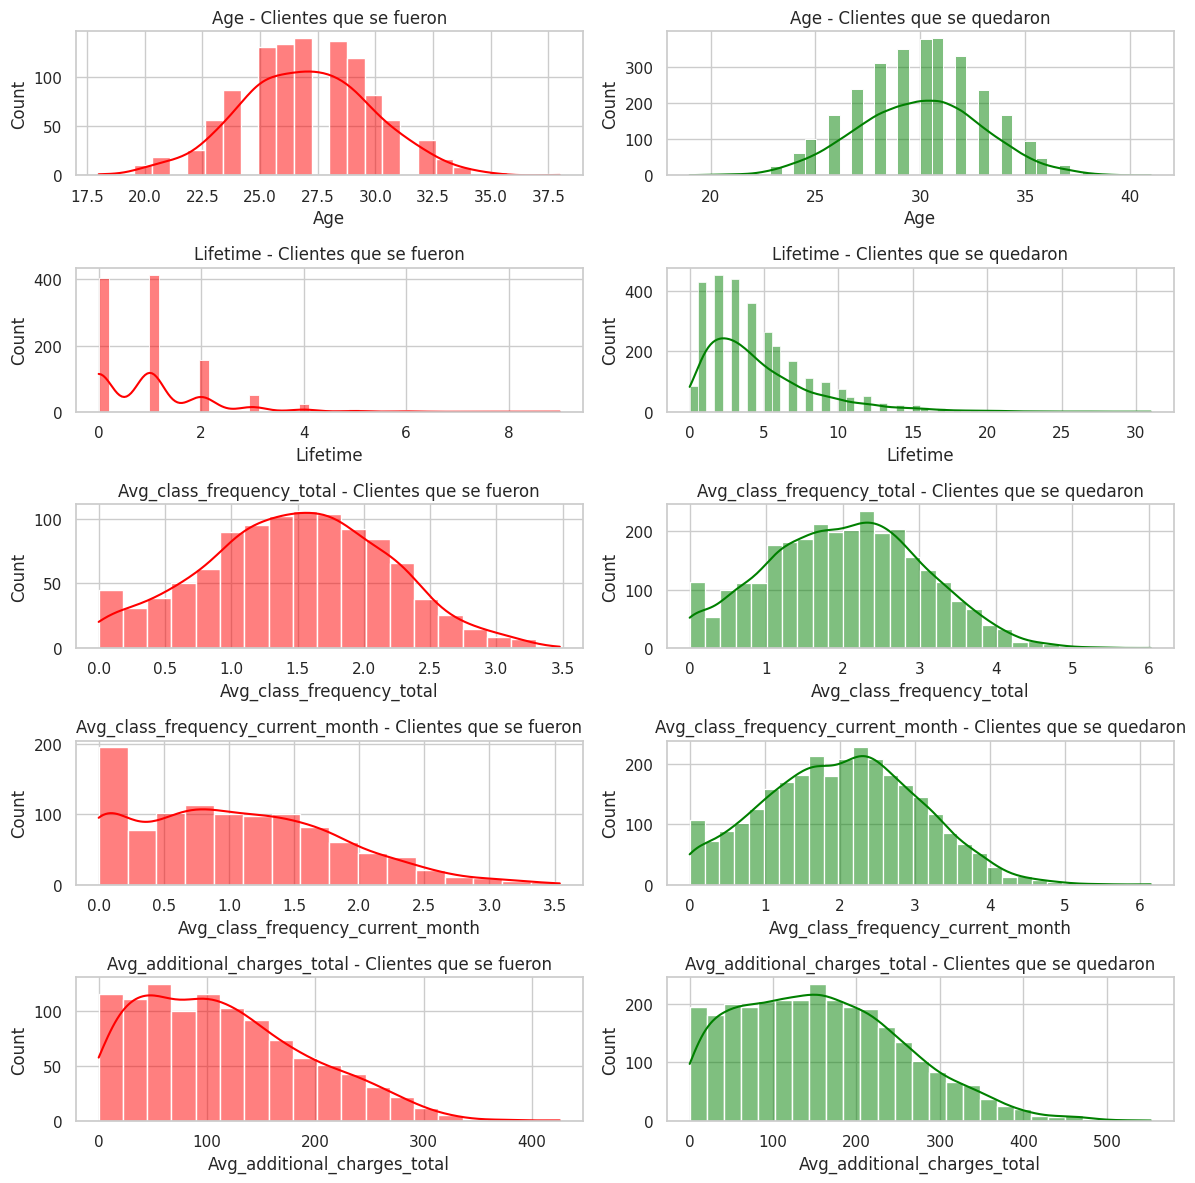

In [8]:

sns.set(style="whitegrid")


variables = ['Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']


fig, axes = plt.subplots(len(variables), 2, figsize=(12, 12))

for i, var in enumerate(variables):
    # Histograma para los que se fueron
    sns.histplot(df_mf[df_mf['Churn'] == 1][var], kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} - Clientes que se fueron')
    
    # Histograma para los que se quedaron
    sns.histplot(df_mf[df_mf['Churn'] == 0][var], kde=True, color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} - Clientes que se quedaron')

plt.tight_layout()
plt.show()


### Crea una matriz de correlación y muéstrala. 

<Figure size 1000x800 with 0 Axes>

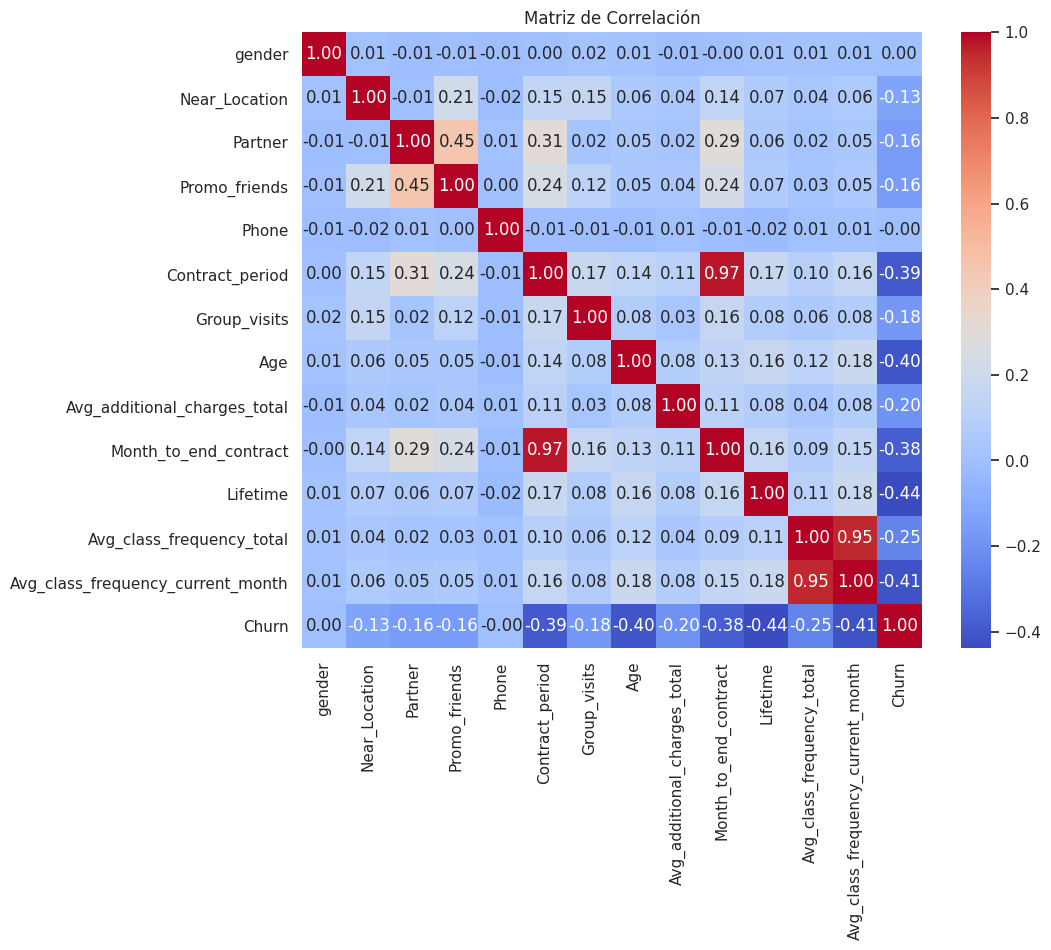

In [9]:
# Calcular la matriz de correlación
correlation_mf = df_mf.corr()

plt.figure(figsize=(10, 8))  #

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mf, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

##  Construir un modelo para predecir la cancelación de usuarios 

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [10]:
df_mf = pd.get_dummies(df_mf)

In [11]:
df_mf

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [12]:
X = df_mf.drop(columns=['Churn'])  
y = df_mf['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [14]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Entrena el modelo en el set de entrenamiento con dos métodos:
    regresión logística;
    
    bosque aleatorio.

#### regresión logística;

 El algoritmo de regresión logística tuvo problemas para converger las características de los datos ya que tienen escalas muy diferentes. Debido a esto se estandarizaron los datos antes de entrenar el modelo.

In [15]:
rl_model = LogisticRegression(random_state = 0)

rl_model.fit(X_train_st, y_train)

# utiliza el modelo entrenado para hacer previsiones
rl_predictions = rl_model.predict(X_test_st)
rl_probabilities = rl_model.predict_proba(X_test_st)[:,1]

#### Arbol de desicion 

In [16]:
tree_model = DecisionTreeClassifier(random_state=0)

tree_model.fit(X_train , y_train)# entrena modelo
 

# utiliza el modelo entrenado para hacer previsiones
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

In [17]:
print('Métricas del árbol de decisión')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probabilities)))

Métricas del árbol de decisión
Accuracy: 0.90
Precision: 0.79
Recall: 0.80
F1: 0.80
ROC_AUC: 0.87


### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Regresión logistica 

In [18]:
accuracy = accuracy_score(y_test, rl_predictions)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, rl_predictions)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, rl_predictions)
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, rl_predictions)
print(f'F1-Score: {f1:.2f}')

cm = confusion_matrix(y_test, rl_predictions)
print(f'Confusion Matrix:\n{cm}')

roc_auc = roc_auc_score(y_test, rl_probabilities)
print(f'ROC AUC: {roc_auc:.2f}')




Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1-Score: 0.84
Confusion Matrix:
[[574  28]
 [ 34 164]]
ROC AUC: 0.97


Arbol de desicion 

In [19]:
print('Métricas del árbol de decisión')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probabilities)))

Métricas del árbol de decisión
Accuracy: 0.90
Precision: 0.79
Recall: 0.80
F1: 0.80
ROC_AUC: 0.87


El modelo de arbol de desicion tiene una mayor precisión pero un recall más bajo, lo que podría ser más adecuado si se prefiere predecir correctamente a los usuarios que se van. El modelo de regresión logistica es mejor si se prefiere identificar más usuarios en riesgo de abandonar el gimnasio, un mayor recall será más valioso.

## Paso 4. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

### Estandarizar los datos 

Antes de realizar cualquier tipo de clustering, es importante normalizar o estandarizar las características de los usuarios. Esto se hace porque muchos algoritmos de clustering son sensibles a las escalas de las características. 

In [20]:
X_mf = df_mf.drop(columns=['Churn'])

# Estandarizamos los datos
scaler = StandardScaler()
X_mf_st = scaler.fit_transform(X_mf)


### Crear una matriz de distancias con linkage() y trazar un dendrograma

Se utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

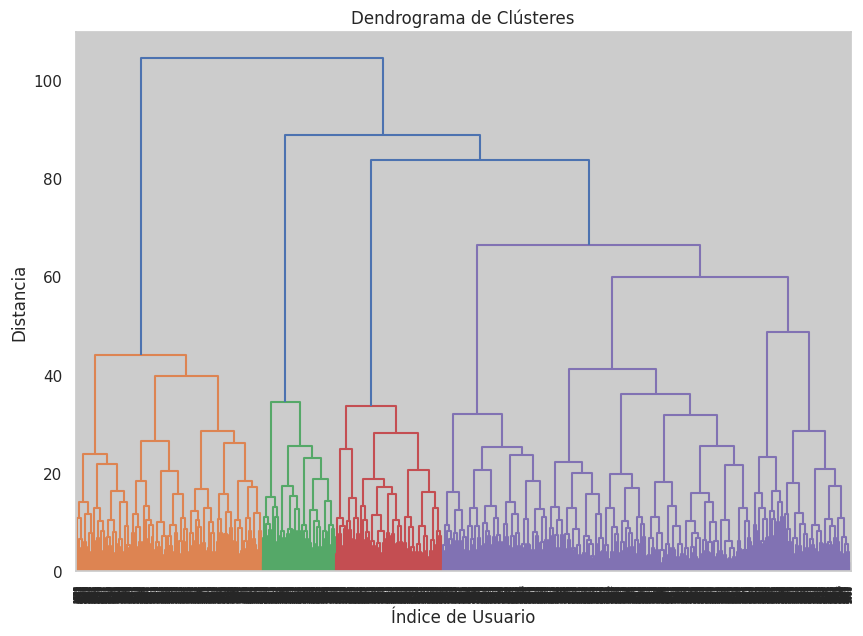

In [21]:
Z = sch.linkage(X_mf_st, method='ward')

# Trazo del dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrograma de Clústeres')
plt.xlabel('Índice de Usuario')
plt.ylabel('Distancia')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.


In [22]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_mf_st)


cluster_labels = kmeans.predict(X_mf_st)


df_mf['Cluster'] = cluster_labels


Se dejo que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [23]:

cluster_means = df_mf.groupby('Cluster').mean()

print(cluster_means)


           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

Parece que el cluster numero 3, maneja la medida más baja en casi todas las caraacteristicas menos en la de baja, esa parece ser la más alta a comparación de los demás, parecen ser los menos motivados y por eso terminaran por cancelar?.




### Traza distribuciones de características para los clústeres. ¿Notas algo?

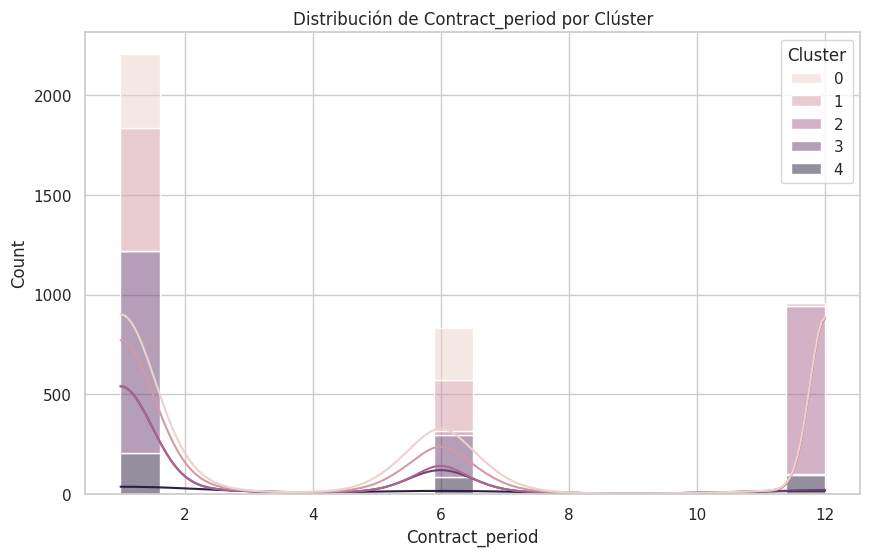

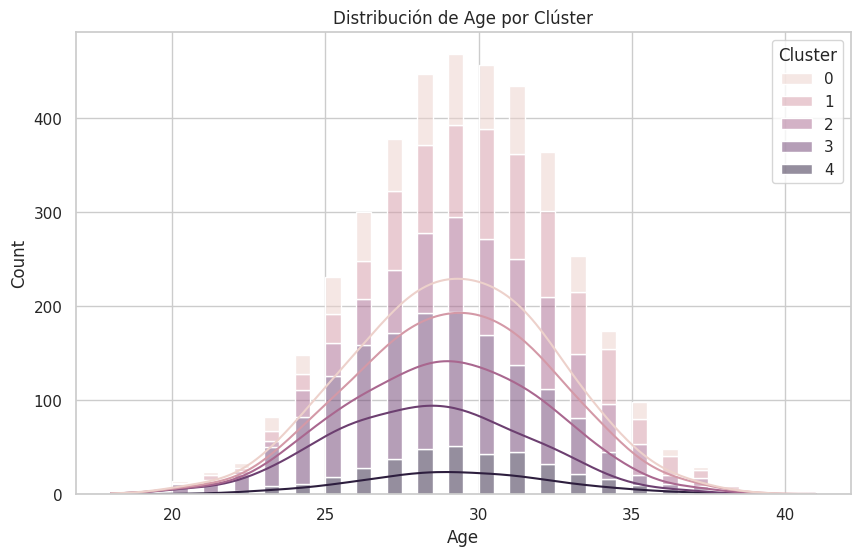

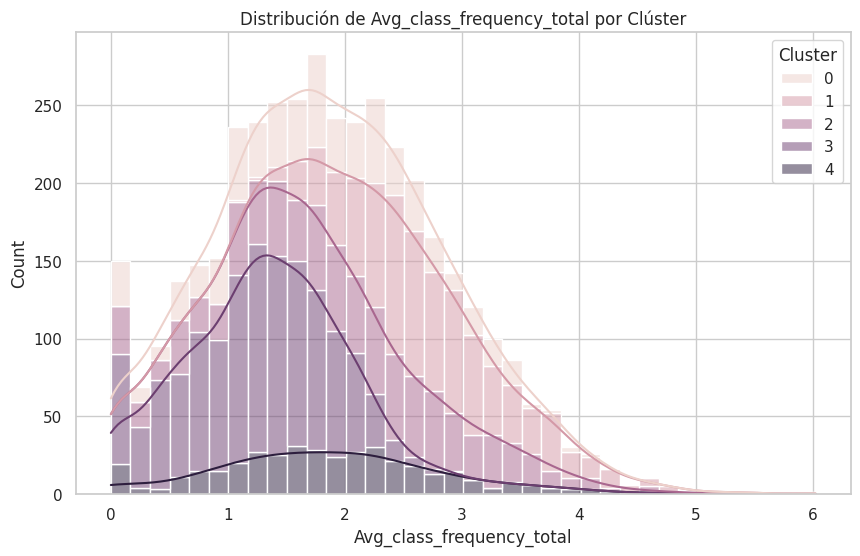

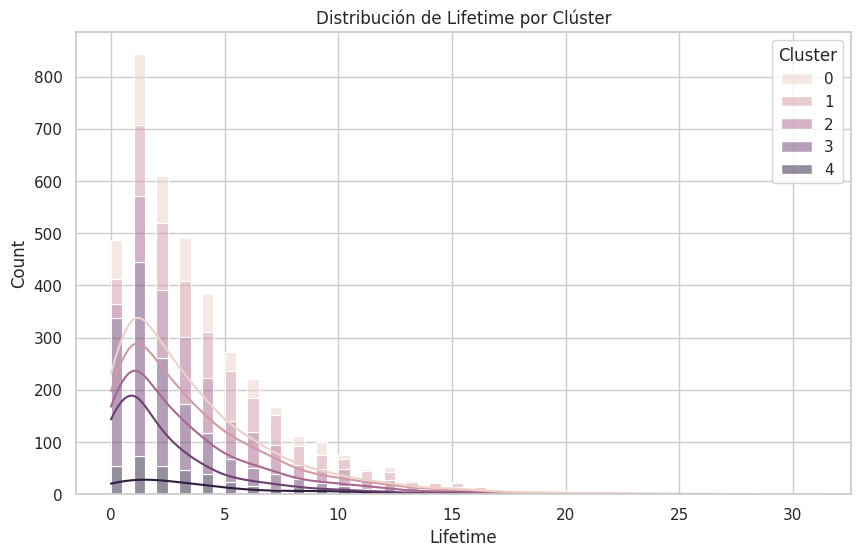

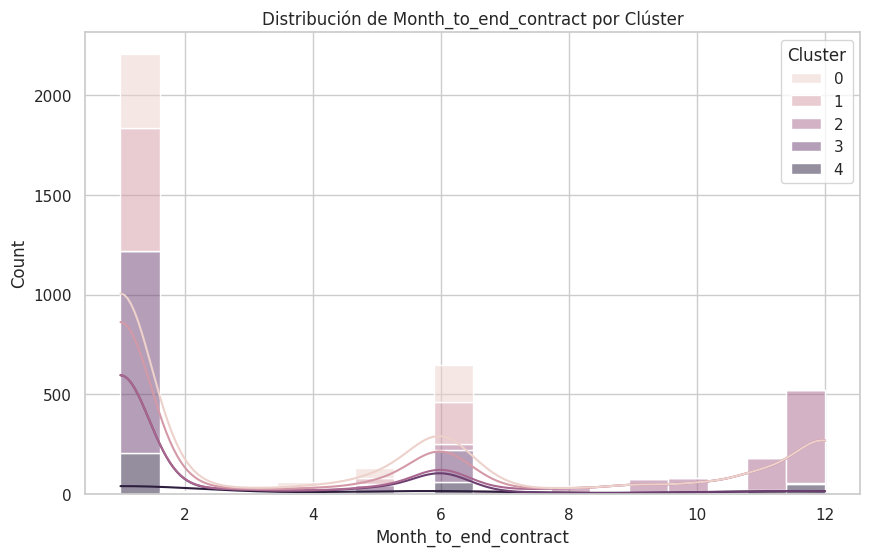

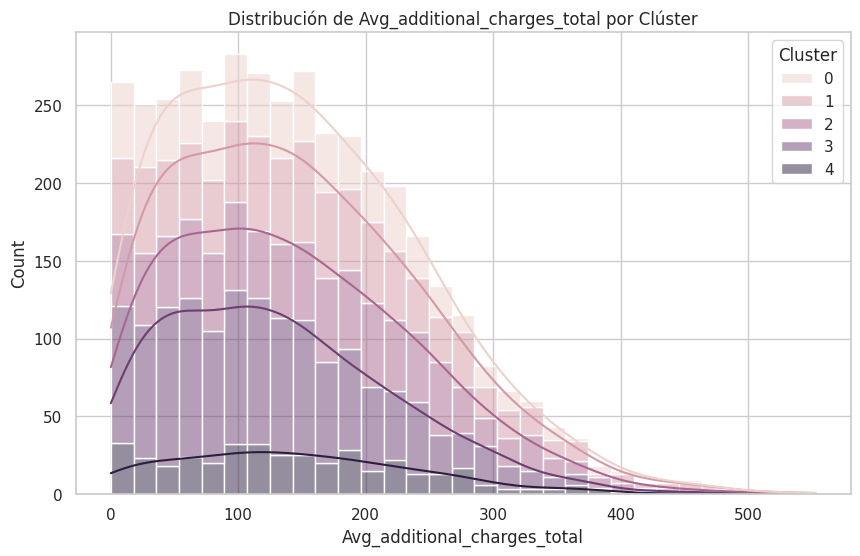

In [24]:
features = [ 'Contract_period', 'Age', 'Avg_class_frequency_total', 'Lifetime', 'Month_to_end_contract', 'Avg_additional_charges_total']  

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_mf, x=feature, hue='Cluster', multiple="stack", kde=True)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()

Este paso te permitio visualizar cómo se distribuyen las características entre los diferentes clústeres y ver si hay diferencias claras en las distribuciones de cada grupo.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()).

¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [25]:
# Calcular la tasa de cancelación por clúster
cancellation_rate_by_cluster = df_mf.groupby('Cluster')['Churn'].mean()

print(cancellation_rate_by_cluster)


Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


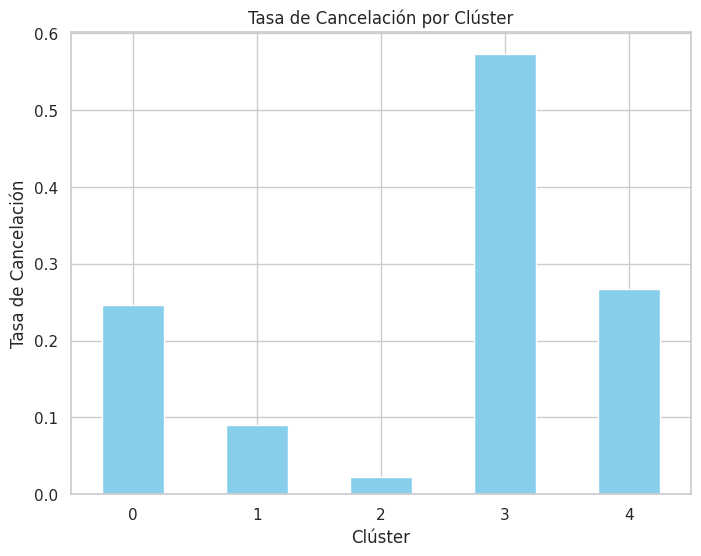

In [26]:
cancellation_rate_by_cluster.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Tasa de Cancelación por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.xticks(rotation=0)
plt.show()

Si hay diferencias en la tasa de cancelación, el cluster 3 tiene una cancelcacioón del 57%, es la mas alta. 
El closter 0 y 4 son muy similares, ya que ambas tienen una tasa de cancelación del 24% y "6% respectivamente. 
mientras que los cluster 1 y 2 tienen la tasa de cancelación más baja, siendo del 8 y 2% respectivamente. 

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Hay algunas conclusiones y recomendaciones a las que se llegaron: 

Los clústeres que gastan más en servicios adicionales (cafetería, masajes, productos deportivos, etc.) tienen menor tasa de cancelación, lo que sugiere que la inversión adicional en el gimnasio puede estar asociada con una mayor satisfacción y lealtad del cliente.



En resumen, para mejorar la retención de usuarios en el gimnasio Model Fitness, es clave segmentar a los clientes en grupos con diferentes características de comportamiento y ofrecer estrategias personalizadas para cada grupo. Los clústeres con una alta tasa de cancelación necesitan atención especial, mientras que los usuarios leales deben ser recompensados para mantener su satisfacción y evitar la rotación.